In [13]:
import pandas as pd
#reading data from input csv file
defaulter = pd.read_csv("datasets/defaulter.csv")
defaulter


,defaulter,student,balance,income
0,No,Yes,817.1804,12106.14
1,Yes,Yes,1486.9980,17854.40
2,Yes,Yes,1102.4350,17391.78
3,Yes,Yes,1233.4460,12586.48
4,Yes,Yes,1276.6850,19282.44
5,Yes,Yes,1289.2460,13624.55
6,No,Yes,673.8124,17672.29
7,No,No,870.4124,17685.45
8,No,Yes,903.1768,15810.57
9,No,Yes,879.6270,14898.31


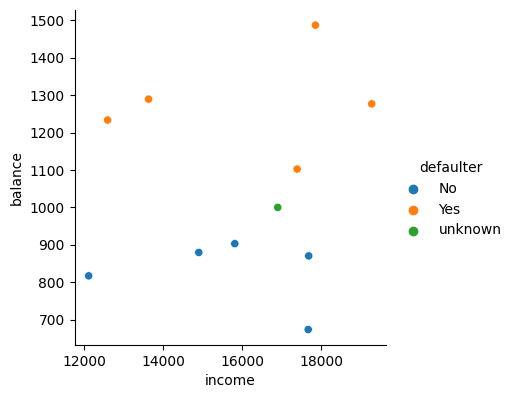

In [14]:
#visualizing data using seaborn - pariplot
import seaborn as sns
sns.pairplot(defaulter,hue="defaulter",
             x_vars="income",y_vars="balance",height=4)


In [15]:
# You can see a customer with a balance of 1000 and income of 16,900 is currently
# not classified as either defaulter/non-defaulter. We can use kNN to classify this instance.

In [16]:
# The kNN algorithm identifies the nearest neighbors based on Euclidean distance*
# - a commonly used distance metric. 
# The Euclidean distance between two (tuples) -
# X1 (x11, x12, x13, .. x1n) and 
# X2 (x21, x22, x23, .. x2n) 
# can be computed as:
#  d(X1,X2) = Root(sigma((x1-x2)^2))

# In the given scenario, each instance has two numeric attributes such as balance and income.
# Thus, each instance here is represented as a point in a 2-dimensional space.
# Let us now compute the Euclidean distance between a few tuples in the given scenario.
# Let X1 be the tuple at index 0 (balance=817.1804, income=12106.14, defaulter=No) and X2 be the tuple at index 1 (balance=1486.998, income=17854.4, defaulter=Yes). 

In [17]:
import numpy as np
# retrieving first data point from the dataset
x1 = defaulter.loc[0,["balance","income"]]
# retrieving second data point from the dataset
x2 = defaulter.loc[1,["balance","income"]]
# Euclidean distance between first and second data point
np.linalg.norm(x1-x2)
#output
#5787.1537602581275


5787.1537602581275

In [18]:
# ne of the limitations of Euclidean distance is that attributes with larger ranges contribute more value to the Euclidean distance.

# For example, if the numeric attributes are age and loan amount, then it can be observed that the typical age in years for humans may range from 0 to 100 years, however, the loan amount in dollars may range from 0 dollars to several thousand dollars.

# Let us illustrate this with a simple example. Consider 3 data tuples T1 (age=26, loanAmt=1000), T2 (age=66, loanAmt=1000) and T3 (age=36, loanAmt=10000).

# The Euclidean distance of the tuple T3 from T1 and T2 can be computed as:

# considering 3 random datapoints - t1, t2, t3
t1 = np.array([26,1000])
t2 = np.array([66,1000])
t3 = np.array([36,10000])
# distance between t1 & t3
dist_t3_t1 = np.linalg.norm(t3-t1)
# distance between t2 & t3
dist_t2_t3 = np.linalg.norm(t2-t3)
print("Distance between t2 and t3",dist_t2_t3,
      "\nDistance between t1 and t3",dist_t3_t1)
#output
#Distance between t2 and t3 9000.049999861112 
#Distance between t1 and t3 9000.00555555384

Distance between t2 and t3 9000.049999861112 
Distance between t1 and t3 9000.00555555384


In [19]:
# You can observe that the difference in the values of age for T1 and T3 (i.e. 26-36=10) 
# is significantly less than the difference in the values of age for T2 and T3 (i.e. 66-36=30). 
# However, the Euclidean distance between the tuples T1 and T3 is same as that of the 
# Euclidean distance between the tuples T2 and T3, suggesting that the parameter
# loanAmt has a high influence on the Euclidean distance as compared to the age.

# To avoid this situation, all the numeric attributes of the tuples can be normalized 
# before they are used for computing the Euclidean distance. Normalization is essential 
# to take into consideration, the different measurement scales of the attributes.
# Normalization is not just applied to kNN, it is often considered as a good practice 
# to normalize the data before running any machine learning algorithm. 

In [20]:
# Normalizing the Data
# There are several normalization techniques that can be applied. These methods are available in the package 'sklearn.preprocessing'. 

# Let us now normalize the balance and income in the defaulter dataset and find the euclidean distance between instances X1 (tuple at index 0 - balance=817.1804, income=12106.14, defaulter=No) and X2 (tuple at index 1 - balance=1486.998, income=17854.4, defaulter=Yes).  

# To normalize the data, use the min-max normalization.
# This normalization transforms the value v of a numeric attribute A to a value v', where 

# v' = (v- min a)/(max a - min a)

# Using MinMaxScaler of Scikit Learn library for Normalization of all features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(defaulter[["balance","income"]])
defaulter["norm_balance"] = scaled_values[:,0]
defaulter["norm_income"] = scaled_values[:,1]
defaulter


,defaulter,student,balance,income,norm_balance,norm_income
0,No,Yes,817.1804,12106.14,0.176304,0.000000
1,Yes,Yes,1486.9980,17854.40,1.000000,0.801006
2,Yes,Yes,1102.4350,17391.78,0.527091,0.736541
3,Yes,Yes,1233.4460,12586.48,0.688199,0.066934
4,Yes,Yes,1276.6850,19282.44,0.741371,1.000000
5,Yes,Yes,1289.2460,13624.55,0.756818,0.211587
6,No,Yes,673.8124,17672.29,0.000000,0.775630
7,No,No,870.4124,17685.45,0.241765,0.777463
8,No,Yes,903.1768,15810.57,0.282057,0.516203
9,No,Yes,879.6270,14898.31,0.253097,0.389082


In [21]:
#distance between two normalized data points
x1_n = defaulter.loc[0,["norm_balance","norm_income"]]
x2_n = defaulter.loc[1,["norm_balance","norm_income"]]
np.linalg.norm(x1_n-x2_n)
#output
#1.1489497815843785


1.1489497815843788

In [22]:
# Lambda function to calculate Euclidean distance
x11 = defaulter.loc[10,["norm_balance","norm_income"]] 
dist_to_X11 = lambda x: np.linalg.norm(x-x11)
# calculating Euclidean Distance
defaulter["dist_toX11"] = defaulter[["norm_balance",
                                               "norm_income"]].apply(dist_to_X11,axis=1)
# sorting the datapoints based on distance to find the 'k' nearest neighbors
defaulter.sort_values("dist_toX11")

,defaulter,student,balance,income,norm_balance,norm_income,dist_toX11
10,unknown,Yes,1000.0000,16900.00,0.401123,0.668013,0.000000
2,Yes,Yes,1102.4350,17391.78,0.527091,0.736541,0.143401
8,No,Yes,903.1768,15810.57,0.282057,0.516203,0.192932
7,No,No,870.4124,17685.45,0.241765,0.777463,0.193325
9,No,Yes,879.6270,14898.31,0.253097,0.389082,0.315775
6,No,Yes,673.8124,17672.29,0.000000,0.775630,0.415309
4,Yes,Yes,1276.6850,19282.44,0.741371,1.000000,0.475378
5,Yes,Yes,1289.2460,13624.55,0.756818,0.211587,0.578657
1,Yes,Yes,1486.9980,17854.40,1.000000,0.801006,0.613466
3,Yes,Yes,1233.4460,12586.48,0.688199,0.066934,0.666114


In [23]:
# # Recall that the kNN algorithm identifies the k nearest neighbors of a new tuple and assigns it a class label based on the class labels of its nearest neighbors. 

# # Let us consider the value of k as 1, which means that, the kNN algorithm assigns a class label based on its nearest neighbor.
# # The kNN algorithm would therefore classify the tuple X11 as default= Yes based on its nearest neighbor X3 (tuple at index 2) since the nearest neighbor (X3) has a class label of default=Yes.  

# For all values of k greater than 1, a data tuple is classified by a majority vote of its neighbors. The tuple will be assigned the class that is most common among its k nearest neighbors.

# If the value of k was selected as 3, the 3-nearest-neighbors of the data tuple X11 (balance=1000, income=16900) are identified. In this case they are X3 (balance=1102.435, income=17391.78, defaulter=Yes), X9(balance=903.1768, income=15810.57, defaulter=No) and X8(balance=870.4124, income=17685.45, defaulter=No) based on the Euclidean distances computed earlier.

# The new tuple would be classified as defaulter/non-defaulter based on the majority vote of the neighbors X3, X9 and X8. In this case, the majority vote indicates that the new tuple (X11) would be a non-defaulter.

# For k=2, X3 (balance=1102.435, income=17391.78, defaulter=Yes) and X9(balance=903.1768, income=15810.57, defaulter=No) are the 2 closest neighbors of X11 based on the Euclidean distances. In this case, you can see a tie in the votes (i.e. 1 vote for defaulter and 1 vote for non-defaulter).

# Therefore, it is difficult to classify the data tuple X11 as defaulter or a non-defaulter because the vote count results in a tie. Typically for binary-class cases (like defaulter= Y/N), an odd value of k is preferred to avoid such tie situations. For multi-class cases (more than 2 classes), the ties can be broken by assigning a class at random or by assigning the class that occurs most frequently.

In [24]:
# Building Model Using sklearn
#reading in data from csv file
defaulter = pd.read_csv("datasets/defaulter.csv")


from sklearn.preprocessing import MinMaxScaler
#applying MinMaxScaler to the default dataset
scaler = MinMaxScaler()
features_to_scale = ["balance","income"]
scaled_values = scaler.fit_transform(defaulter[features_to_scale])
defaulter["norm_balance"] = scaled_values[:,0]
defaulter["norm_income"] = scaled_values[:,1]
defaulter.head()


,defaulter,student,balance,income,norm_balance,norm_income
0,No,Yes,817.1804,12106.14,0.176304,0.000000
1,Yes,Yes,1486.9980,17854.40,1.000000,0.801006
2,Yes,Yes,1102.4350,17391.78,0.527091,0.736541
3,Yes,Yes,1233.4460,12586.48,0.688199,0.066934
4,Yes,Yes,1276.6850,19282.44,0.741371,1.000000


In [25]:
from sklearn.model_selection import train_test_split
# selecting the predictors and target
X=defaulter[['norm_balance','norm_income']]
Y=defaulter['defaulter']
# splitting data into train and test data set
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)


In [26]:
# Building the model
from sklearn.neighbors import KNeighborsClassifier
#kNN with k=3
model = KNeighborsClassifier(n_neighbors=3,metric="euclidean")
model.fit(X_train,Y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [27]:
# Evaluate the Performace of the model
train_accuracy = model.score(X_train,Y_train)
test_accuracy = model.score(X_test,Y_test)
print(train_accuracy,test_accuracy)
#output
#0.977375 0.967


0.75 1.0


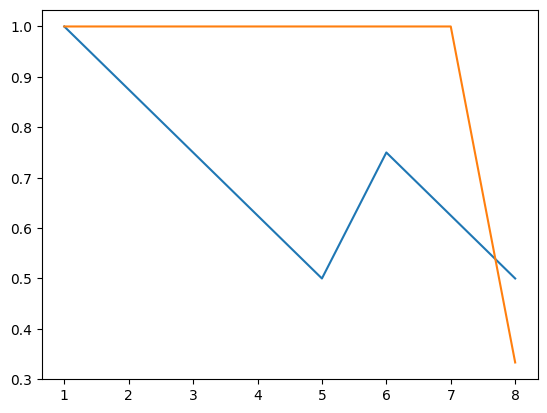

In [32]:
# In our example, value chosen for k is 3 while building the model. 
# However, the choice of k affects the performance of the model. 
# So, for the kNN algorithm, k is a hyperparameter that needs to be tuned.

# The below code demonstrates the train and test accuracy for 
# different values of k on the defaulter dataset:

import matplotlib.pyplot as plt
%matplotlib inline

train_accuracies = []
test_accuracies = []
# building KNN model for values of k from 1 to 100
k_vals = [i for i in range(1,9)]
features = ["norm_balance","norm_income"]
target = "defaulter"
for k in k_vals:
    model = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    model.fit(X_train,Y_train)
    train_accuracy_k = model.score(X_train,Y_train)
    test_accuracy_k = model.score(X_test,Y_test)
    train_accuracies.append(train_accuracy_k)
    test_accuracies.append(test_accuracy_k)
plt.plot(k_vals,train_accuracies)
plt.plot(k_vals,test_accuracies)

